In [4]:
#Script for processing the hydrofabric and hydroatlas products
import fiona
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set option to display all rows
pd.set_option('display.max_rows', None)

# Set option to display all columns
pd.set_option('display.max_columns', None)

In [2]:

#Read in the hydrofabric data
hydrofabric_loc = 'R:\\Data\\conus_reference_features_prerelease.gpkg'
layers = fiona.listlayers(hydrofabric_loc)
print(layers)
hydrofabric = gpd.read_file(hydrofabric_loc, layer='catchments')

['catchments', 'flowlines', 'waterbodies']


KeyboardInterrupt: 

In [3]:
#Read in the hydroatlas data
hydroatlas_loc = 'R:\\Code\\hydrofab_py\\subcatchment_investigation\\BasinATLAS_v10_lev12_CONUS.shp'
hydroatlas = gpd.read_file(hydroatlas_loc)



In [7]:
print(hydroatlas.columns)
print(hydroatlas.describe())

Index(['HYBAS_ID', 'NEXT_DOWN', 'NEXT_SINK', 'MAIN_BAS', 'DIST_SINK',
       'DIST_MAIN', 'SUB_AREA', 'UP_AREA', 'PFAF_ID', 'ENDO',
       ...
       'hft_ix_s93', 'hft_ix_u93', 'hft_ix_s09', 'hft_ix_u09', 'gad_id_smj',
       'gdp_ud_sav', 'gdp_ud_ssu', 'gdp_ud_usu', 'hdi_ix_sav', 'geometry'],
      dtype='object', length=295)
           HYBAS_ID     NEXT_DOWN     NEXT_SINK      MAIN_BAS     DIST_SINK  \
count  6.451100e+04  6.451100e+04  6.451100e+04  6.451100e+04  64511.000000   
mean   7.120798e+09  6.927509e+09  7.120150e+09  7.120148e+09   1608.908259   
std    1.041727e+07  1.157177e+09  1.041595e+07  1.041596e+07   1434.743772   
min    7.120012e+09  0.000000e+00  7.120007e+09  7.120007e+09      0.000000   
25%    7.120479e+09  7.120462e+09  7.120035e+09  7.120035e+09    307.100000   
50%    7.120642e+09  7.120618e+09  7.120047e+09  7.120047e+09   1394.100000   
75%    7.121006e+09  7.120792e+09  7.120047e+09  7.120047e+09   2502.950000   
max    8.120469e+09  8.120469e+09  8.1

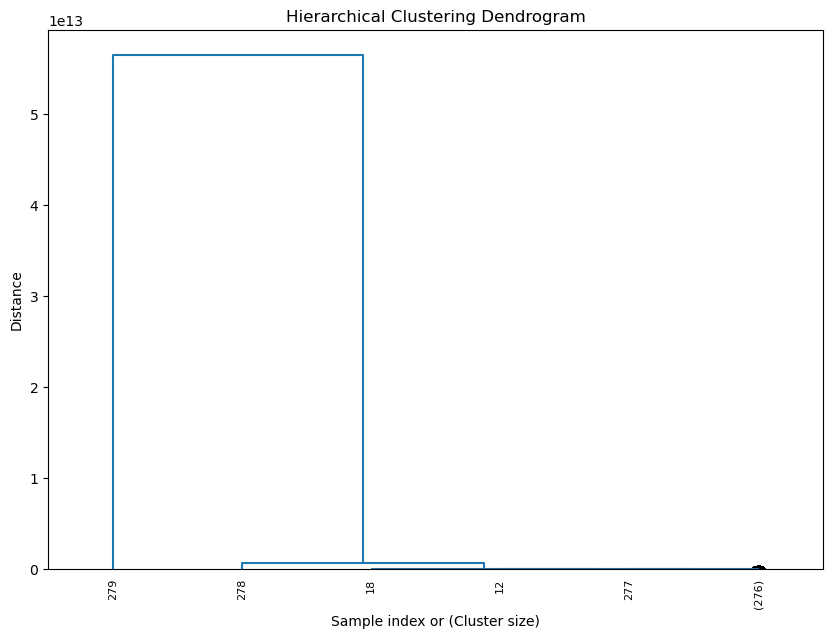

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

def plot_dendrogram(model, labels, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    # The linkage_matrix requires a "distance" column, which we can fill with zeros
    # because `AgglomerativeClustering` does not provide distances.
    linkage_matrix = np.column_stack(
        [model.children_, np.zeros(model.children_.shape[0]), counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, labels=labels, **kwargs)

# Assuming you want to cluster the variables (columns), not the observations (rows)
desired_hydroatlas_columns = list(hydroatlas.columns)[13:-1]

# Let's assume `df` is your pandas DataFrame with ~280 columns of data.
# Transpose the DataFrame to cluster columns instead of rows.
X = hydroatlas[desired_hydroatlas_columns].T.values

# Generate the linkage matrix. The 'ward' method is an option; you can choose others like 'single', 'complete', etc.
Z = linkage(X, method='ward')

# Plot the dendrogram.
plt.figure(figsize=(10, 7))  # You might need to adjust the figure size to fit your screen.
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index or (Cluster size)')
plt.ylabel('Distance')

# Since you want to form 6 clusters, you can use the 'lastp' truncate_mode to show the last p merged clusters.
# We can use the 'color_threshold' to specify the distance at which clusters should be distinguished.
dendrogram(
    Z,
    leaf_rotation=90.,  # Rotates the x-axis labels to be more readable
    leaf_font_size=8.,  # Adjust the size of the x-axis labels to fit your preference
    truncate_mode='lastp',  # show only the last p merged clusters
    p=6,  # show only the last 6 merged clusters
    show_contracted=True,  # to give a better sense of the cluster distribution
    # You might need to adjust this value. This is just an example threshold.
    color_threshold=70  
)

plt.show()

In [7]:
hydroatlas.describe()

,HYBAS_ID,NEXT_DOWN,NEXT_SINK,MAIN_BAS,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,PFAF_ID,ENDO,...,rdd_mk_uav,hft_ix_s93,hft_ix_u93,hft_ix_s09,hft_ix_u09,gad_id_smj,gdp_ud_sav,gdp_ud_ssu,gdp_ud_usu,hdi_ix_sav
count,6.451100e+04,6.451100e+04,6.451100e+04,6.451100e+04,64511.000000,64511.000000,64511.000000,6.451100e+04,6.451100e+04,64511.000000,...,64511.000000,64511.000000,64511.000000,64511.000000,64511.000000,64511.000000,64511.000000,6.451100e+04,6.451100e+04,64511.000000
mean,7.120798e+09,6.927509e+09,7.120150e+09,7.120148e+09,1608.908259,1638.478517,130.683341,1.582473e+04,7.501438e+11,0.112461,...,374.753654,84.386337,74.154671,82.269117,72.460914,230.007410,48421.113174,2.666894e+08,1.589675e+10,902.904078
std,1.041727e+07,1.157177e+09,1.041595e+07,1.041596e+07,1434.743772,1429.381311,57.913895,1.307985e+05,1.819342e+10,0.349393,...,1369.076618,77.790814,63.198687,77.058340,62.023661,39.530202,7539.811713,1.614195e+09,1.566400e+11,49.116936
min,7.120012e+09,0.000000e+00,7.120007e+09,7.120007e+09,0.000000,0.000000,0.100000,3.000000e-01,7.120003e+11,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,41.000000,14275.000000,0.000000e+00,0.000000e+00,752.000000
25%,7.120479e+09,7.120462e+09,7.120035e+09,7.120035e+09,307.100000,348.050000,104.500000,1.724000e+02,7.424223e+11,0.000000,...,56.000000,32.000000,32.000000,33.000000,33.000000,240.000000,45307.000000,5.370840e+05,3.462011e+06,889.000000
50%,7.120642e+09,7.120618e+09,7.120047e+09,7.120047e+09,1394.100000,1425.500000,135.800000,3.727000e+02,7.429542e+11,0.000000,...,130.000000,58.000000,53.000000,58.000000,54.000000,240.000000,48454.000000,1.011979e+07,8.331877e+07,918.000000
75%,7.121006e+09,7.120792e+09,7.120047e+09,7.120047e+09,2502.950000,2526.800000,166.200000,1.566050e+03,7.723102e+11,0.000000,...,287.000000,111.000000,100.000000,100.000000,90.000000,240.000000,53263.000000,8.817282e+07,8.476334e+08,943.000000
max,8.120469e+09,8.120469e+09,8.120010e+09,8.120010e+09,6000.100000,6000.100000,500.200000,3.179500e+06,8.228999e+11,2.000000,...,103346.000000,488.000000,481.000000,488.000000,481.000000,240.000000,90996.000000,1.802214e+11,3.953332e+12,955.000000


In [4]:
hydroatlas = hydroatlas.to_crs(hydrofabric.crs)

joined_gdf = gpd.sjoin(hydrofabric, hydroatlas, how="left", op='intersects')
joined_gdf.head()


r:\Programs\ArcGISPRO\bin\Python\envs\arcgispro-py3\nidavellir\lib\site-packages\IPython\core\interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,featureid,areasqkm,gridcode,sourcefc,geometry,index_right,HYBAS_ID,NEXT_DOWN,NEXT_SINK,MAIN_BAS,...,rdd_mk_uav,hft_ix_s93,hft_ix_u93,hft_ix_s09,hft_ix_u09,gad_id_smj,gdp_ud_sav,gdp_ud_ssu,gdp_ud_usu,hdi_ix_sav
0,869,9.86805,1812269.0,NHDFlowline,"POLYGON ((2118975.000 2893605.000, 2118885.000...",18102.0,7.121004e+09,7.120387e+09,7.120039e+09,7.120039e+09,...,180.0,62.0,62.0,63.0,63.0,240.0,48224.0,35067092.0,35067092.0,925.0
0,869,9.86805,1812269.0,NHDFlowline,"POLYGON ((2118975.000 2893605.000, 2118885.000...",17735.0,7.121002e+09,7.121002e+09,7.120038e+09,7.120038e+09,...,24.0,17.0,17.0,17.0,17.0,240.0,48224.0,0.0,0.0,925.0
1,881,2.37510,1812583.0,NHDFlowline,"POLYGON ((2106045.000 2884425.000, 2106165.000...",18111.0,7.121003e+09,7.120384e+09,7.120039e+09,7.120039e+09,...,114.0,34.0,34.0,34.0,34.0,240.0,48224.0,1877491.0,1877491.0,925.0
2,885,3.79935,1811658.0,NHDFlowline,"POLYGON ((2119335.000 2890155.000, 2119455.000...",18102.0,7.121004e+09,7.120387e+09,7.120039e+09,7.120039e+09,...,180.0,62.0,62.0,63.0,63.0,240.0,48224.0,35067092.0,35067092.0,925.0
3,897,0.87255,1812406.0,NHDFlowline,"POLYGON ((2099565.000 2882415.000, 2099565.000...",18111.0,7.121003e+09,7.120384e+09,7.120039e+09,7.120039e+09,...,114.0,34.0,34.0,34.0,34.0,240.0,48224.0,1877491.0,1877491.0,925.0


In [5]:
del hydroatlas
del hydrofabric

import gc
gc.collect()

0

In [6]:
mid_idx = len(joined_gdf) // 2

gdf_1 = joined_gdf.iloc[:mid_idx]
gdf_2 = joined_gdf.iloc[mid_idx:]

gdf_1.to_file("R:\\Code\\hydrofab_py\\subcatchment_investigation\\hydrofabric_sampled_hydroatlas_CONUS_part1.shp")
gdf_2.to_file("R:\\Code\\hydrofab_py\\subcatchment_investigation\\hydrofabric_sampled_hydroatlas_CONUS_part2.shp")


C:\Users\Rappj\AppData\Local\Temp\ipykernel_15888\1625048670.py:6: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_1.to_file("R:\\Code\\hydrofab_py\\subcatchment_investigation\\hydrofabric_sampled_hydroatlas_CONUS_part1.shp")


# Camels Work Flow

Running PCA on the CAMELS Dataset 

In [3]:
camels_loc = 'E:\\CAMELS\\camels-20230726T1128Z\\basin_set_full_res\\HCDN_nhru_final_671.shp'
camels = gpd.read_file(camels_loc)
camels = camels.to_crs(hydroatlas.crs)
centroids = camels.geometry.centroid

# Convert the centroids to a new GeoDataFrame
centroids_gdf = gpd.GeoDataFrame(camels.drop('geometry', axis=1), geometry=centroids)

camels_sampled = gpd.sjoin(camels, hydroatlas, how="left", op='intersects')
camels_sampled.head()



C:\Users\Rappj\AppData\Local\Temp\ipykernel_15504\265558365.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = camels.geometry.centroid
r:\Programs\ArcGISPRO\bin\Python\envs\arcgispro-py3\nidavellir\lib\site-packages\IPython\core\interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,hru_id,ann_P,lon_cen,lat_cen,AREA,elev_mean,ave_T,july_T,Perimeter,geometry,...,rdd_mk_uav,hft_ix_s93,hft_ix_u93,hft_ix_s09,hft_ix_u09,gad_id_smj,gdp_ud_sav,gdp_ud_ssu,gdp_ud_usu,hdi_ix_sav
0,1013500,0.0,-68.56551,47.01169,2.303988e+09,277.49349,None,None,647993,"MULTIPOLYGON (((-68.35650 46.90311, -68.35612 ...",...,0,27,11,27,11,240,48224,0,0,925
0,1013500,0.0,-68.56551,47.01169,2.303988e+09,277.49349,None,None,647993,"MULTIPOLYGON (((-68.35650 46.90311, -68.35612 ...",...,3,36,36,36,36,240,48224,0,0,925
0,1013500,0.0,-68.56551,47.01169,2.303988e+09,277.49349,None,None,647993,"MULTIPOLYGON (((-68.35650 46.90311, -68.35612 ...",...,0,12,8,12,8,240,48224,0,0,925
0,1013500,0.0,-68.56551,47.01169,2.303988e+09,277.49349,None,None,647993,"MULTIPOLYGON (((-68.35650 46.90311, -68.35612 ...",...,50,44,44,39,39,240,48224,1132905,1132905,925
0,1013500,0.0,-68.56551,47.01169,2.303988e+09,277.49349,None,None,647993,"MULTIPOLYGON (((-68.35650 46.90311, -68.35612 ...",...,0,2,2,2,2,240,48224,0,0,925


In [4]:
desired_hydroatlas_columns = list(hydroatlas.columns)[13:-1]
print(desired_hydroatlas_columns)

['dis_m3_pyr', 'dis_m3_pmn', 'dis_m3_pmx', 'run_mm_syr', 'inu_pc_smn', 'inu_pc_umn', 'inu_pc_smx', 'inu_pc_umx', 'inu_pc_slt', 'inu_pc_ult', 'lka_pc_sse', 'lka_pc_use', 'lkv_mc_usu', 'rev_mc_usu', 'dor_pc_pva', 'ria_ha_ssu', 'ria_ha_usu', 'riv_tc_ssu', 'riv_tc_usu', 'gwt_cm_sav', 'ele_mt_sav', 'ele_mt_uav', 'ele_mt_smn', 'ele_mt_smx', 'slp_dg_sav', 'slp_dg_uav', 'sgr_dk_sav', 'clz_cl_smj', 'cls_cl_smj', 'tmp_dc_syr', 'tmp_dc_uyr', 'tmp_dc_smn', 'tmp_dc_smx', 'tmp_dc_s01', 'tmp_dc_s02', 'tmp_dc_s03', 'tmp_dc_s04', 'tmp_dc_s05', 'tmp_dc_s06', 'tmp_dc_s07', 'tmp_dc_s08', 'tmp_dc_s09', 'tmp_dc_s10', 'tmp_dc_s11', 'tmp_dc_s12', 'pre_mm_syr', 'pre_mm_uyr', 'pre_mm_s01', 'pre_mm_s02', 'pre_mm_s03', 'pre_mm_s04', 'pre_mm_s05', 'pre_mm_s06', 'pre_mm_s07', 'pre_mm_s08', 'pre_mm_s09', 'pre_mm_s10', 'pre_mm_s11', 'pre_mm_s12', 'pet_mm_syr', 'pet_mm_uyr', 'pet_mm_s01', 'pet_mm_s02', 'pet_mm_s03', 'pet_mm_s04', 'pet_mm_s05', 'pet_mm_s06', 'pet_mm_s07', 'pet_mm_s08', 'pet_mm_s09', 'pet_mm_s10', 'pet_

In [15]:
camels_group = camels_sampled.groupby('hru_id')[desired_hydroatlas_columns].mean()
camels_group = camels_group.dropna()
print(camels_group.shape)
camels_group.head()
camels_group = camels_group.reset_index()
# Export PCA components to CSV file
camels_group.to_csv("H:\\Shared drives\\SI_NextGen_Aridity\\data\\hydroATLAS_Camels\\camels_hydroatlas.csv", index=False)


(671, 281)


In [5]:
#Reimport camels_hydroatlas data

camels_group = pd.read_csv("H:\\Shared drives\\SI_NextGen_Aridity\\data\\hydroATLAS_Camels\\camels_hydroatlas.csv")


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = camels_group.drop(columns=['hru_id']).values
y = camels_group['hru_id'].values

std_scaler = StandardScaler()
scaled_df = std_scaler.fit_transform(X)

# Convert the scaled features back into a DataFrame
scaled_df_export = pd.DataFrame(scaled_df, columns=camels_group.drop(columns=['hru_id']).columns)

# Add the 'hru_id' column back to the DataFrame
scaled_df_export['hru_id'] = y

# Optionally, if you want 'hru_id' to be the first column
scaled_df_export = scaled_df_export[['hru_id'] + [col for col in scaled_df_export.columns if col != 'hru_id']]
print(scaled_df_export)
# scaled_df_export.to_csv("H:\\Shared drives\\SI_NextGen_Aridity\\data\\hydroATLAS_Camels\\camels_hydroatlas_scaled.csv", index=False)


       hru_id  dis_m3_pyr  dis_m3_pmn  dis_m3_pmx  run_mm_syr  inu_pc_smn  \
0     1013500    0.251177    0.335449    0.381453    0.458379    0.418223   
1     1022500   -0.138430   -0.107830   -0.153747    0.967856    0.350520   
2     1030500   -0.043296    0.085586   -0.078920    0.645159    0.989162   
3     1031500   -0.045913    0.083260   -0.093887    0.788447    0.716742   
4     1047000    0.044304    0.217840    0.005390    0.780980    0.276929   
5     1052500   -0.110564   -0.089573   -0.094834    0.828455   -0.029209   
6     1054200    0.202631    0.100325    0.260464    2.010763    1.198285   
7     1055000   -0.106305   -0.077592   -0.096453    0.891203    0.641939   
8     1057000    0.228271    0.125124    0.336199    1.230122    0.271042   
9     1073000   -0.063255   -0.010543   -0.078482    0.829536    2.266823   
10    1078000   -0.082247   -0.025417   -0.091707    0.456938   -0.285304   
11    1118300   -0.103565   -0.071053   -0.126483    0.843368    0.006115   

[0.22486723 0.40533905 0.48069817 0.53413515 0.58013146 0.61968516
 0.65520367 0.6865776  0.71034261 0.73171314 0.74990315 0.7672262
 0.78206237 0.795444   0.80741887 0.81813908 0.82799566 0.83728401
 0.84611178 0.85419629 0.86183003 0.86937176 0.87664424 0.88360658
 0.89000984 0.89582983 0.90129167 0.90642488 0.91140902 0.91628272
 0.92064456 0.92492886 0.92885316 0.93247905 0.93599706 0.93938189
 0.94257935 0.94571431 0.94839198 0.95090362 0.95328608 0.95558945
 0.95779471 0.95984906 0.96179388 0.96368995 0.9655021  0.96716837
 0.96878464 0.97032649 0.97178815 0.97312807 0.97441529 0.97558933
 0.97671615 0.97782203 0.97886011 0.97984276 0.9807855  0.98168737
 0.98255756 0.98342446 0.98419696 0.9849559  0.98563433 0.98629658
 0.98690826 0.98751014 0.98807273 0.98863301 0.98916784 0.98968162
 0.99018273 0.99065219 0.99110009 0.99149815 0.99188754 0.99226552
 0.99263633 0.99298428 0.99331069 0.99360679 0.9938968  0.99416891
 0.99443738 0.99468948 0.99493453 0.99516698 0.99537448 0.99557

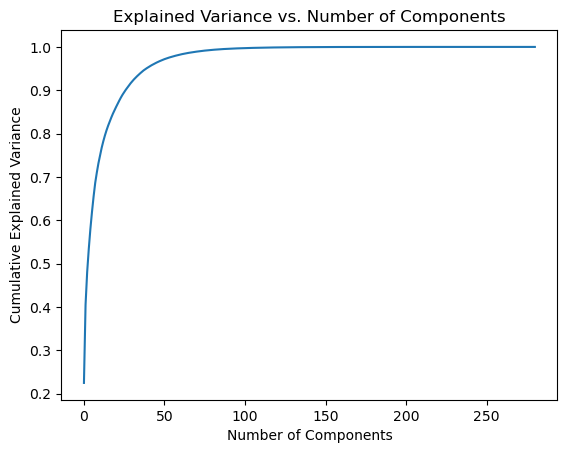

In [8]:

pca = PCA() #Select components
x_pca = pca.fit_transform(scaled_df)

explained_variance = np.cumsum(pca.explained_variance_ratio_)
print(explained_variance)
fig, ax = plt.subplots()
ax.plot(explained_variance)

# export explained variance to CSV file


ax.set_xlabel('Number of Components')
ax.set_ylabel('Cumulative Explained Variance')
ax.set_title('Explained Variance vs. Number of Components')
# fig.savefig('H:\\Shared drives\\SI_NextGen_Aridity\\data\\hydroATLAS_Camels\\explained_variance_plot_all_components.png', dpi=300)
plt.show()

# Convert PCA-transformed data back to DataFrame
pca_df = pd.DataFrame(x_pca, columns=[f'PC{i+1}' for i in range(x_pca.shape[1])])

# Add 'hru_id' column back
pca_df['hru_id'] = y

# Optionally, if you want 'hru_id' to be the first column
pca_df = pca_df[['hru_id'] + [col for col in pca_df.columns if col != 'hru_id']]

# Save the DataFrame to a CSV file
# pca_df.to_csv("H:\\Shared drives\\SI_NextGen_Aridity\\data\\hydroATLAS_Camels\\camels_hydroatlas_pca_transformed_all.csv", index=False)



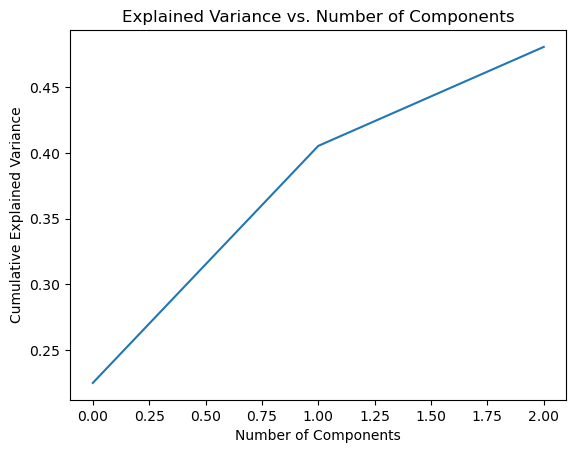

In [22]:
#Get Different PCA's

pca = PCA(n_components=3)
x_pca = pca.fit_transform(scaled_df)

explained_variance = np.cumsum(pca.explained_variance_ratio_)
fig, ax = plt.subplots()
ax.plot(explained_variance)


ax.set_xlabel('Number of Components')
ax.set_ylabel('Cumulative Explained Variance')
ax.set_title('Explained Variance vs. Number of Components')
fig.savefig('H:\\Shared drives\\SI_NextGen_Aridity\\data\\hydroATLAS_Camels\\explained_variance_plot_3.png', dpi=300)
plt.show()

# Convert PCA-transformed data back to DataFrame
pca_df = pd.DataFrame(x_pca, columns=[f'PC{i+1}' for i in range(x_pca.shape[1])])

# Add 'hru_id' column back
pca_df['hru_id'] = y

# Optionally, if you want 'hru_id' to be the first column
pca_df = pca_df[['hru_id'] + [col for col in pca_df.columns if col != 'hru_id']]

# Save the DataFrame to a CSV file
pca_df.to_csv("H:\\Shared drives\\SI_NextGen_Aridity\\data\\hydroATLAS_Camels\\camels_hydroatlas_pca_transformed_3.csv", index=False)

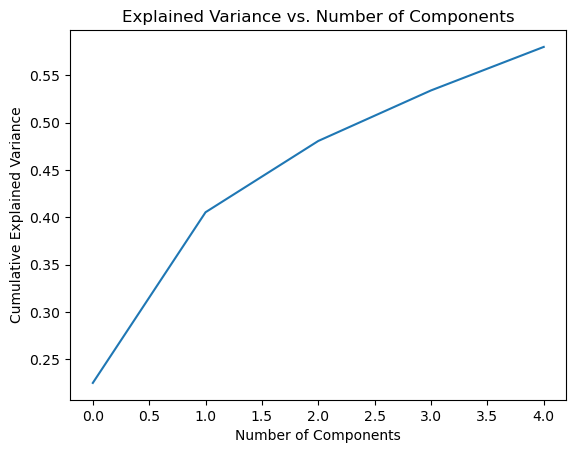

In [12]:
#Get Different PCA's

pca = PCA(n_components=5)
pca.fit_transform(scaled_df)
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()

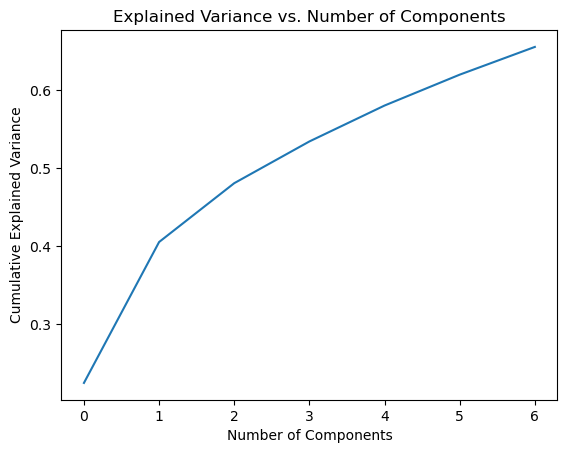

In [13]:
#Get Different PCA's

pca = PCA(n_components=7)
pca.fit_transform(scaled_df)
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()

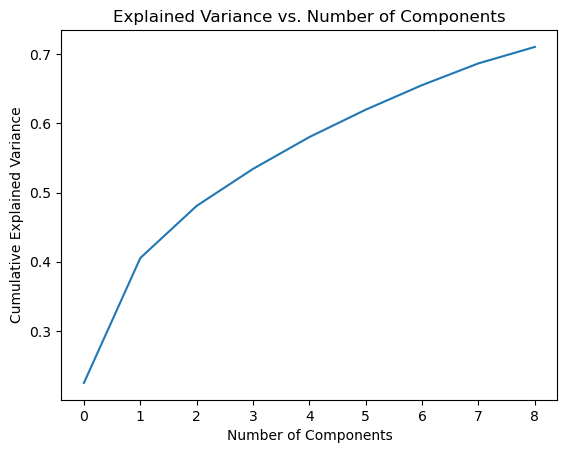

In [14]:
#Get Different PCA's

pca = PCA(n_components=9)
pca.fit_transform(scaled_df)
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()